In [13]:
#STOCK 1 - TESLA
#from pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2016, 5, 1)
end = datetime.datetime(2019, 12, 30)
tsla = web.DataReader('TSLA', 'yahoo', start, end)
tsla.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-02,243.190002,234.820007,241.500000,241.800003,3843900,241.800003
2016-05-03,238.910004,231.619995,237.360001,232.320007,4302200,232.320007
2016-05-04,234.460007,220.399994,230.289993,222.559998,8700500,222.559998
2016-05-05,228.639999,209.789993,228.460007,211.529999,11254800,211.529999
2016-05-06,216.369995,208.110001,210.869995,214.929993,5685200,214.929993
2016-05-09,216.149994,206.800003,215.720001,208.919998,4776400,208.919998
2016-05-10,209.470001,205.000000,207.550003,208.690002,4070600,208.690002
2016-05-11,215.479996,206.050003,207.589996,208.960007,5161900,208.960007
2016-05-12,211.669998,203.660004,211.440002,207.279999,3650500,207.279999


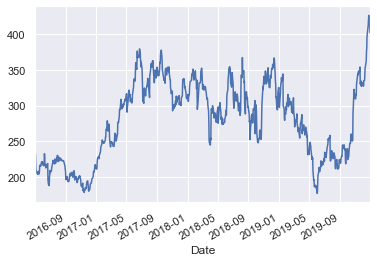

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
vol = tsla['Low']
vol.plot()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



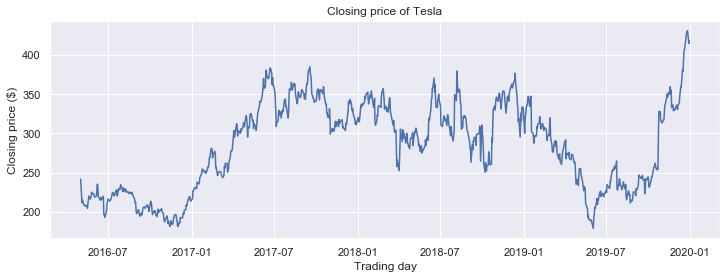

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(tsla.Close)
plt.title('Closing price of Tesla')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(True)
plt.show()

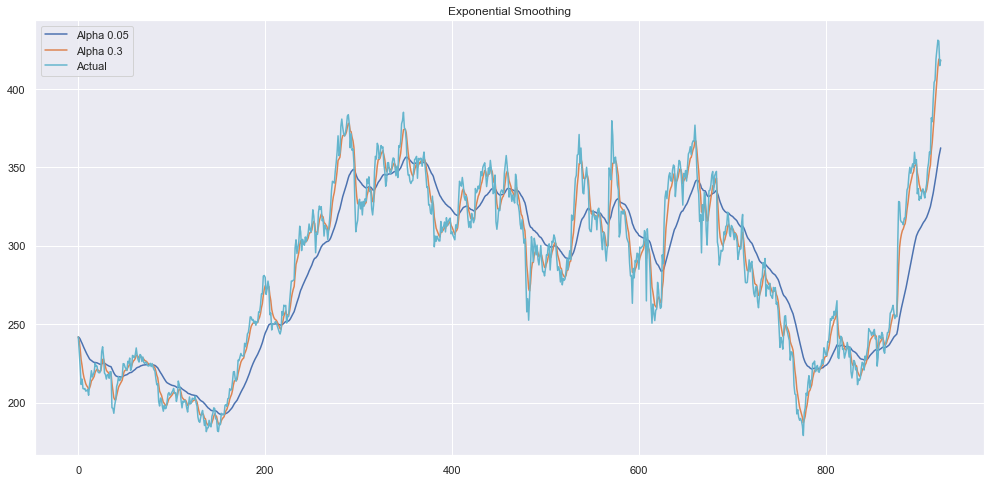

In [17]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(tsla.Close, [0.05, 0.3])

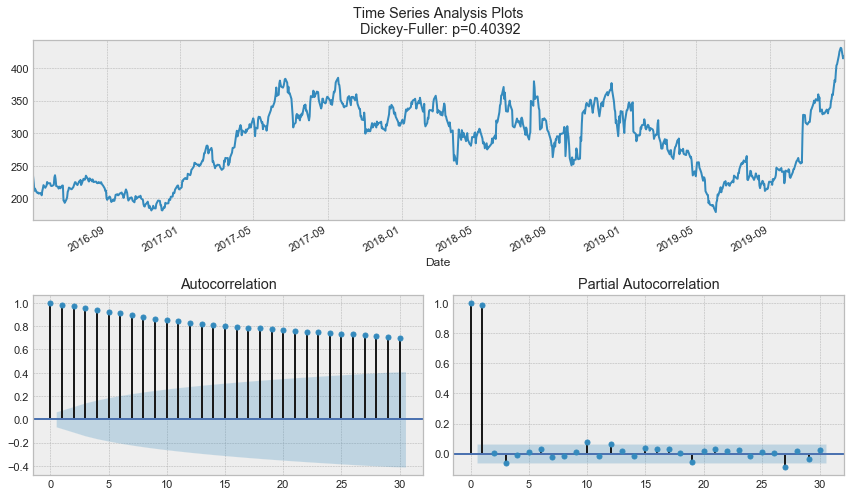

In [18]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(tsla.Close, lags=30)

In [ ]:
# By Dickey-Fuller test, it is not stationary!

In [19]:
#
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [20]:
tsla.head(20)
tsla.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [33]:
pd.concat([tsla.Close, tsla.Close.shift(-15)], axis=1)

,Close,Close
Date,,
2016-05-02,241.800003,216.220001
2016-05-03,232.320007,217.910004
2016-05-04,222.559998,219.580002
2016-05-05,211.529999,225.119995
2016-05-06,214.929993,223.039993
...,...,...
2019-12-24,425.250000,NaN
2019-12-26,430.940002,NaN
2019-12-27,430.380005,NaN


In [34]:
# Need to remove NA
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
def valid(col):
    return 'Close' not in col and col != 'Events_'
X = tsla[[x for x in tsla.columns if valid(x)]].iloc[:-15]
y = tsla.Close.shift(-15).dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
#Create a model 
rf_model = RandomForestRegressor()
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

0.7217656147033806

In [ ]:
# We can predict with an accuracy of 72% for only 15 days in the future!